# Assignment 3

## Part 1

In [110]:
# Import relevant libraries
import os
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy as np
print('numpy: {}'.format(np.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

print("Hello World!")

Python: 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.19.2
pandas: 1.1.3
sklearn: 0.24.2
Hello World!


In [111]:
#Function to load the data
def loadData(path,filename):
    try:
             files = os.listdir(path)
             for f in files:
                 if f == filename:
                     data = pd.read_csv(os.path.join(path,f))
                     return data
            
    except Exception as ex:
           print ("Exception occured in loadData-------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

In [112]:
# Deduce the metrics
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

def metrics(test,pred,modelname):
    try:
        print("Number of mislabeled points out of a total %d points : %d" % (len(test), (test != pred).sum()))
        
        # Accuracy
        acc = accuracy_score(test, pred)
        print('Accuracy of the {:s} model: {:f}'.format(modelname,acc))
        
        # Confusion matrix
        cm=confusion_matrix(test,pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
        _=disp.plot() 
        disp.ax_.set(title=modelname)
        print()
            
    except Exception as ex:
           print ("Exception occured in metrics-------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

In [113]:
# Read the file
path = r'C:\Users\pmspr\Documents\HS\MS\Sem 6\EECS 658\Data'
filename = "iris.csv"
data = loadData(path,filename)
display(data)

y = data.pop('class')
X = data
y_asis = y

# Encode the label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

print('Classes of the label:')
print(le.classes_)

y = list(le.transform(y))

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Classes of the label:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [114]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#Derive two folds for cross validation
X_train1 = X_train; y_train1 = y_train
X_test1 = X_test; y_test1 = y_test

X_train2 = X_test; y_train2 = y_test
X_test2 = X_train; y_test2 = y_train

print('Number of samples in fold1:{}'.format(len(X_train1)))
print('Number of samples in fold2:{}'.format(len(X_train2)))

Number of samples in fold1:75
Number of samples in fold2:75


### Part 1

Number of mislabeled points out of a total 150 points : 3
Accuracy of the Support Vector Machines - Linear SVC model: 0.980000



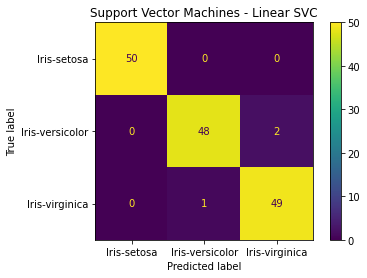

In [115]:
# Model-8-Support Vector Machine - Linear SVC
from sklearn.svm import SVC
m1 = SVC(gamma=.1, kernel='linear', probability=True)

# fold1
clf1 = m1.fit(X_train1,y_train1)
y_pred1 = clf1.predict(X_test1)

# fold2
clf1 = m1.fit(X_train2,y_train2)
y_pred2 = clf1.predict(X_test2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_test1, *y_test2])

# Metrics
metrics(y_testr,y_predr, 'Support Vector Machines - Linear SVC')

# Test 
with pd.ExcelWriter('test.xlsx', mode='a') as writer:
    pd.DataFrame({'actual' : y_testr, 'pred' : y_predr,'raw' : y_raw}).to_excel(writer,sheet_name='SVM',index=False)

### Part 2

In [116]:
import numpy as np
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [117]:
X_array = array([list(X.iloc[i,:]) for i in range(150)])

In [118]:
# define a matrix
A = X_array

# calculate the mean of each column
M = mean(A.T, axis=1)

# center columns by subtracting column means
C = A - M
V = np.var(C[:,0])

# calculate covariance matrix of centered matrix
#V = np.cov(C.T, bias=1)
V = np.cov(C.T)
print('Covariance Matrix:')
print(V)
print('-----------')

# eigendecomposition of covariance matrix
values, vectors = eig(V)
print("Eigen Vectors:")
print(vectors)
print('-----------')
print("Eigen Values:")
print(values)
print('Sum:',np.sum(values))
print('-----------')

# project data
P = vectors.T.dot(C.T)
print("Projected Data")
print(P.T)
print('-----------')

Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
-----------
Eigen Vectors:
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
-----------
Eigen Values:
[4.22484077 0.24224357 0.07852391 0.02368303]
Sum: 4.5692912751677826
-----------
Projected Data
[[-2.68420713e+00 -3.26607315e-01 -2.15118370e-02  1.00615724e-03]
 [-2.71539062e+00  1.69556848e-01 -2.03521425e-01  9.96024240e-02]
 [-2.88981954e+00  1.37345610e-01  2.47092410e-02  1.93045428e-02]
 [-2.74643720e+00  3.11124316e-01  3.76719753e-02 -7.59552741e-02]
 [-2.72859298e+00 -3.33924564e-01  9.62296998e-02 -6.31287327e-02]
 [-2.27989736e+00 -7.47782713e-01  1.74325619e-01 -2.71468037e-02]
 [-2.82089068e+00  

In [119]:
# Proportion of variance
L1 = 4.24025608 
SumL = np.sum(values)
pov = L1/SumL
print('Proportion of Variance (PoV)',pov)

Proportion of Variance (PoV) 0.9279898839113292


Number of mislabeled points out of a total 150 points : 13
Accuracy of the Support Vector Machines - Linear SVC model: 0.913333



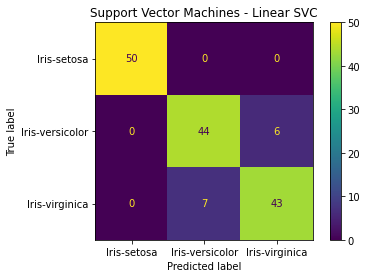

In [120]:
# SVM using subset of transformed iris data
iris_subset = P[0]
iris_subset_df = pd.DataFrame(iris_subset, columns=['irisPca'])

X_train, X_test, y_train, y_test = train_test_split(iris_subset_df, y, test_size=0.5, random_state=1)

#Derive two folds for cross validation
X_tr1 = X_train; y_tr1 = y_train
X_tst1 = X_test; y_tst1 = y_test

X_tr2 = X_test; y_tr2 = y_test
X_tst2 = X_train; y_tst2 = y_train

from sklearn.svm import SVC
m2 = SVC(gamma=.1, kernel='linear', probability=True)

# fold1
clf2 = m2.fit(X_tr1,y_tr1)
y_pred1 = clf2.predict(X_tst1)

# fold2
clf2 = m2.fit(X_tr2,y_tr2)
y_pred2 = clf2.predict(X_tst2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_tst1, *y_tst2])

# Metrics
metrics(y_testr,y_predr, 'Support Vector Machines - Linear SVC')

### Compare with sklearn pca

Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
-----------
Eigen Vectors:
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
-----------
Eigen Values:
[4.22484077 0.24224357 0.07852391 0.02368303]
-----------
Number of mislabeled points out of a total 150 points : 13
Accuracy of the Support Vector Machines - Linear SVC model: 0.913333



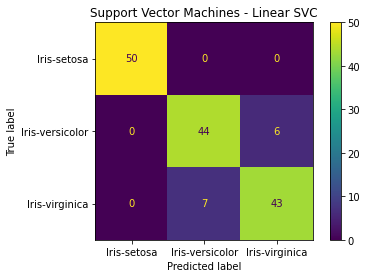

In [121]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

print('Covariance Matrix:')
print(pca.get_covariance())
print('-----------')

print("Eigen Vectors:")
print(pca.components_)
print('-----------')

print("Eigen Values:")
print(pca.explained_variance_)
print('-----------')

#print("Projected Data")
#print(X_pca)
#X_pcadf = pd.DataFrame(np.row_stack(X_pca),columns=['sepal-length','sepal-width','petal-length','petal-width'])
#print('-----------')

iris_subset = X_pca.T[0]
iris_subset_df = pd.DataFrame(iris_subset, columns=['irisPca'])

X_train, X_test, y_train, y_test = train_test_split(iris_subset_df, y, test_size=0.5, random_state=1)

#Derive two folds for cross validation
X_tr1 = X_train; y_tr1 = y_train
X_tst1 = X_test; y_tst1 = y_test

X_tr2 = X_test; y_tr2 = y_test
X_tst2 = X_train; y_tst2 = y_train

from sklearn.svm import SVC
m3 = SVC(gamma=.1, kernel='linear', probability=True)

# fold1
clf3 = m3.fit(X_tr1,y_tr1)
y_pred1 = clf3.predict(X_tst1)

# fold2
clf3 = m3.fit(X_tr2,y_tr2)
y_pred2 = clf3.predict(X_tst2)

# Inverse transform
y_raw   = [*y_pred1, *y_pred2]
y_predr = le.inverse_transform(y_raw)
y_testr = le.inverse_transform([*y_tst1, *y_tst2])

# Metrics
metrics(y_testr,y_predr, 'Support Vector Machines - Linear SVC')

### Part 3

In [122]:
def modelsvm(df,label):
    try:
        X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.5, random_state=1)
        #Derive two folds for cross validation
        X_tr1 = X_train; y_tr1 = y_train
        X_tst1 = X_test; y_tst1 = y_test

        X_tr2 = X_test; y_tr2 = y_test
        X_tst2 = X_train; y_tst2 = y_train

        from sklearn.svm import SVC
        m = SVC(gamma=.1, kernel='linear', probability=True)

        # fold1
        clf = m.fit(X_tr1,y_tr1)
        y_pred1 = clf.predict(X_tst1)

        # fold2
        clf = m.fit(X_tr2,y_tr2)
        y_pred2 = clf.predict(X_tst2)

        # Inverse transform
        y_raw   = [*y_pred1, *y_pred2]
        y_predr = le.inverse_transform(y_raw)
        y_testr = le.inverse_transform([*y_tst1, *y_tst2])
        
        # Metrics
        acc = accuracy_score(y_testr, y_predr)
        
        return acc 
    except Exception as ex:
           print ("Exception occured in svm model-------------------------")
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print (message)

In [123]:
pca_df = pd.DataFrame(X_pca, columns=['sepal-length-pca','sepal-width-pca','petal-length-pca','petal-width-pca'])
icol = ['sepal-length','sepal-width','petal-length','petal-width','sepal-length-pca','sepal-width-pca','petal-length-pca','petal-width-pca']
iris_pca = pd.concat([X, pca_df], axis=1)

In [124]:
# Simulated annealing
iters = 100
accepted_accuracy = 0
accepted_subset = []
current_subset = icol #random.sample(icol,2)
stat = ' '; rr=0
restart_counter= 0
best_accuracy= 0
best_feature_subset= current_subset
##random.seed(23)

for i in range(iters):
    print('Iteration:',i)
    if(random.choice([0,1]) == 0):#add
        
        # Features excluding the current subset
        nodup_list = list( set(icol).difference(current_subset) )
        
        if (len(nodup_list) > 1):
            plist =random.sample(nodup_list, random.choice([1,2]) )
            current_subset = current_subset + plist
            
        elif (len(nodup_list) == 1):
            plist = nodup_list
            current_subset = current_subset + plist
            
        else: #current subset has all the features, so remove random features
            plist =random.sample( icol, random.choice([1,2]) )
            current_subset = list( set(current_subset).difference(plist) )       
        
    else:#delete
    
        if (len(current_subset) == 0): #if current subset is empty, add randome features
            plist =random.sample( icol, random.choice([1,2]) )
            current_subset = current_subset + plist
        else:
            plist =random.sample( icol, random.choice([1,2]) )
            current_subset = list( set(current_subset).difference(plist) )
    
    # discard the empty set
    if (len(current_subset) == 0):
        print('Empty set - discard')
        print('---------------------------------------------')
        continue
        
    temp_df = iris_pca[current_subset]
    model_acc = modelsvm(temp_df,y)
    
    if (accepted_accuracy < model_acc):
        accepted_accuracy = model_acc
        stat = 'Improved'
    else:
        Pr_accept = np.exp( i * ( (accepted_accuracy - model_acc) / accepted_accuracy ) )
        rr = np.random.random()
        if (rr > Pr_accept):
            current_subset = accepted_subset #reject the new dataset
            stat = 'Reject'
        else:
            accepted_accuracy = model_acc
            stat = 'Accept'
              
    accepted_subset = current_subset
    accepted_accuracy = model_acc
    
    # Restart logic
    if (model_acc > best_accuracy):
        best_accuracy = model_acc
        best_feature_subset = accepted_subset
        restart_counter= 0
    else:
        restart_counter = restart_counter + 1
        if (restart_counter == 10):
            current_subset = best_feature_subset
            restart_counter= 0
            stat = 'Restart'
    
    print('Accepted Features:',accepted_subset)
    print('Accuracy:',model_acc)
    print('Pr[accept]:',Pr_accept)
    print('Random uniform:',rr)
    print('Status:',stat)
    print('---------------------------------------------')

Iteration: 0
Accepted Features: ['sepal-length-pca', 'sepal-length', 'petal-length', 'petal-width-pca', 'sepal-width-pca', 'petal-width', 'petal-length-pca']
Accuracy: 0.9733333333333334
Pr[accept]: 1.9610291025166253
Random uniform: 0
Status: Improved
---------------------------------------------
Iteration: 1
Accepted Features: ['sepal-length-pca', 'sepal-length', 'petal-length', 'petal-width-pca', 'sepal-width-pca', 'petal-width', 'petal-length-pca', 'sepal-width']
Accuracy: 0.98
Pr[accept]: 1.9610291025166253
Random uniform: 0
Status: Improved
---------------------------------------------
Iteration: 2
Accepted Features: ['sepal-length-pca', 'sepal-length', 'petal-length-pca', 'petal-length', 'sepal-width', 'sepal-width-pca', 'petal-width-pca']
Accuracy: 0.98
Pr[accept]: 1.0
Random uniform: 0.5270079001478027
Status: Accept
---------------------------------------------
Iteration: 3
Accepted Features: ['sepal-length-pca', 'sepal-length', 'petal-length-pca', 'petal-length', 'sepal-widt

Accepted Features: ['sepal-length-pca', 'petal-width', 'petal-width-pca', 'petal-length-pca', 'sepal-width-pca', 'sepal-width', 'sepal-length']
Accuracy: 0.98
Pr[accept]: 1.0
Random uniform: 0.05285855820619778
Status: Accept
---------------------------------------------
Iteration: 59
Accepted Features: ['sepal-length-pca', 'petal-width', 'petal-width-pca', 'petal-length-pca', 'sepal-width-pca', 'sepal-width', 'sepal-length', 'petal-length']
Accuracy: 0.98
Pr[accept]: 1.0
Random uniform: 0.6447747511142015
Status: Accept
---------------------------------------------
Iteration: 60
Accepted Features: ['sepal-length-pca', 'sepal-length', 'petal-length', 'sepal-width', 'sepal-width-pca', 'petal-width', 'petal-length-pca']
Accuracy: 0.9733333333333334
Pr[accept]: 1.5040527007501252
Random uniform: 0.6886285272274072
Status: Accept
---------------------------------------------
Iteration: 61
Accepted Features: ['sepal-length-pca', 'sepal-length', 'petal-length', 'sepal-width', 'sepal-width-pc

Status: Improved
---------------------------------------------
Iteration: 89
Accepted Features: ['sepal-width-pca', 'sepal-width', 'petal-length', 'petal-width-pca']
Accuracy: 0.96
Pr[accept]: 6.149227908551515
Random uniform: 0.04730869777717206
Status: Restart
---------------------------------------------
Iteration: 90
Accepted Features: ['sepal-width-pca', 'petal-width', 'petal-length', 'petal-width-pca', 'petal-length-pca', 'sepal-length', 'sepal-length-pca']
Accuracy: 0.9733333333333334
Pr[accept]: 6.149227908551515
Random uniform: 0.04730869777717206
Status: Improved
---------------------------------------------
Iteration: 91
Accepted Features: ['sepal-width-pca', 'petal-width', 'petal-length', 'petal-width-pca', 'petal-length-pca', 'sepal-length', 'sepal-length-pca', 'sepal-width']
Accuracy: 0.98
Pr[accept]: 6.149227908551515
Random uniform: 0.04730869777717206
Status: Improved
---------------------------------------------
Iteration: 92
Accepted Features: ['sepal-length', 'petal

### Part 4

In [ ]:
# Genetic Algorithm